#### Import Libraries and load dataset

In [2]:

import sys, os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))  # add project root to PYTHONPATH

from scripts.viz_theme import set_viz_theme
palette = set_viz_theme()


In [3]:
# import the core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the dataset
df= pd.read_csv("../data/data_processed/hotel_bookings_cleaned.csv")

In [5]:
# Quick look

df.head()

,booking_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,guest_count,booking_status,arrival_date,seasons,total_revenue,guest_type,country_full_name,region,adr_num,total_revenue_num
0,14118,Resort Hotel,0,2,2017,May,21,24,0,1,...,3,Booked,2017-05-22,Summer,107.25,group,Portugal,Europe,107.25,107.25
1,18149,Resort Hotel,0,23,2016,December,49,3,0,1,...,4,Booked,2016-11-10,Winter,100.00,family,Spain,Europe,100.00,100.00
2,23173,Resort Hotel,0,140,2017,April,16,22,2,5,...,2,Booked,2016-12-03,Summer,0.00,couple,United Kingdom,Europe,0.00,0.00
3,23238,Resort Hotel,0,1,2016,May,19,4,0,1,...,1,Booked,2016-05-03,Summer,63.00,single,Portugal,Europe,63.00,63.00
4,23587,Resort Hotel,0,3,2017,May,21,22,1,2,...,1,Booked,2017-05-19,Summer,156.00,single,Portugal,Europe,52.00,156.00


In [6]:
df.shape

(119210, 44)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   booking_id                      119210 non-null  int64  
 1   hotel                           119210 non-null  object 
 2   is_canceled                     119210 non-null  int64  
 3   lead_time                       119210 non-null  int64  
 4   arrival_date_year               119210 non-null  int64  
 5   arrival_date_month              119210 non-null  object 
 6   arrival_date_week_number        119210 non-null  int64  
 7   arrival_date_day_of_month       119210 non-null  int64  
 8   stays_in_weekend_nights         119210 non-null  int64  
 9   stays_in_week_nights            119210 non-null  int64  
 10  adults                          119210 non-null  int64  
 11  children                        119210 non-null  int64  
 12  babies          

In [8]:
# Convert date columns to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [9]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [10]:
# Numeric Summary
df.describe().T

,count,mean,min,25%,50%,75%,max,std
booking_id,119210.0,59656.939107,1.0,29810.25,59637.5,89484.75,119390.0,34460.032979
is_canceled,119210.0,0.370766,0.0,0.0,0.0,1.0,1.0,0.483012
lead_time,119210.0,104.109227,0.0,18.0,69.0,161.0,737.0,106.87545
arrival_date_year,119210.0,2016.156472,2015.0,2016.0,2016.0,2017.0,2017.0,0.707485
arrival_date_week_number,119210.0,27.163376,1.0,16.0,28.0,38.0,53.0,13.601107
arrival_date_day_of_month,119210.0,15.798717,1.0,8.0,16.0,23.0,31.0,8.78107
stays_in_weekend_nights,119210.0,0.927053,0.0,0.0,1.0,2.0,19.0,0.995117
stays_in_week_nights,119210.0,2.499195,0.0,1.0,2.0,3.0,50.0,1.897106
adults,119210.0,1.859206,0.0,2.0,2.0,2.0,55.0,0.575186
children,119210.0,0.104043,0.0,0.0,0.0,0.0,10.0,0.398836


In [11]:
df.isnull().sum().sort_values(ascending=False).head(10)

company                      112442
agent                         16280
booking_id                        0
hotel                             0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
dtype: int64

#### Explore Booking by hotel type  
Question : Which hotel more bookings and Higher ADR ?


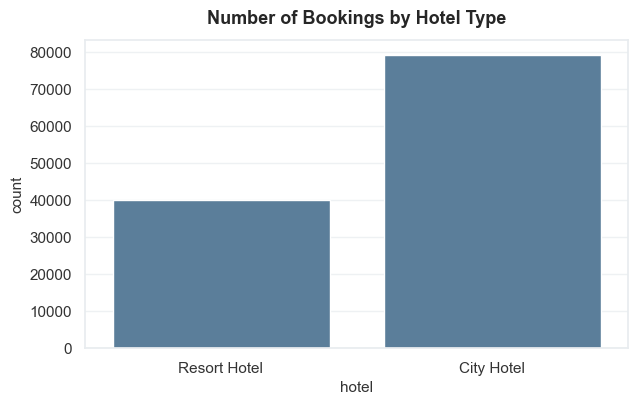

In [12]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='hotel')
plt.title("Number of Bookings by Hotel Type")
plt.show()

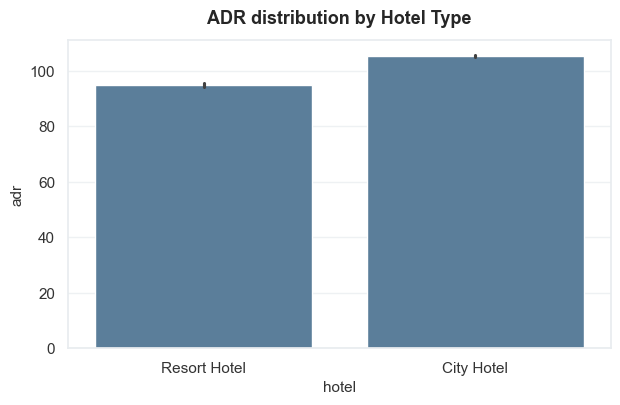

In [13]:
plt.Figure(figsize=(7,4))
sns.barplot(data=df, x='hotel', y='adr')
plt.title("ADR distribution by Hotel Type")
plt.show()

Resorts likely have longer stays (avg 4–5 nights)
Cities likely have shorter stays (1–3 nights)
-> More guests rotate through City Hotels, increasing total booking count.

In [14]:
# avg Stay Length
df.groupby('hotel')['stay_length'].mean().round(1)


hotel
City Hotel      3.0
Resort Hotel    4.3
Name: stay_length, dtype: float64

In [15]:
# lead time
df.groupby('hotel')['lead_time'].mean().round(1)


hotel
City Hotel      109.9
Resort Hotel     92.7
Name: lead_time, dtype: float64

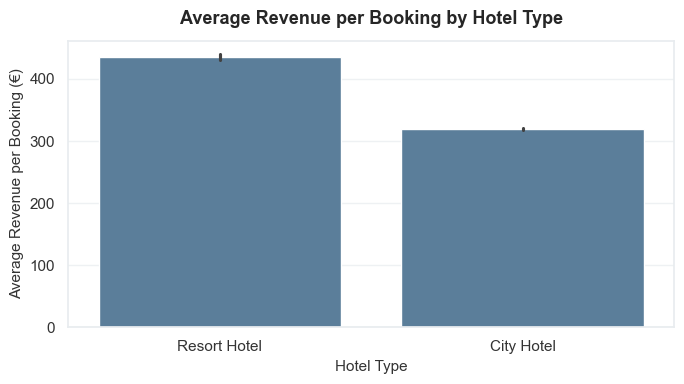

In [17]:
sns.barplot(data=df, x='hotel', y='total_revenue')
plt.title("Average Revenue per Booking by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Average Revenue per Booking")
plt.tight_layout()
plt.show()

### Lead Time Behavior  
Question : Do guests who book early cancel more?

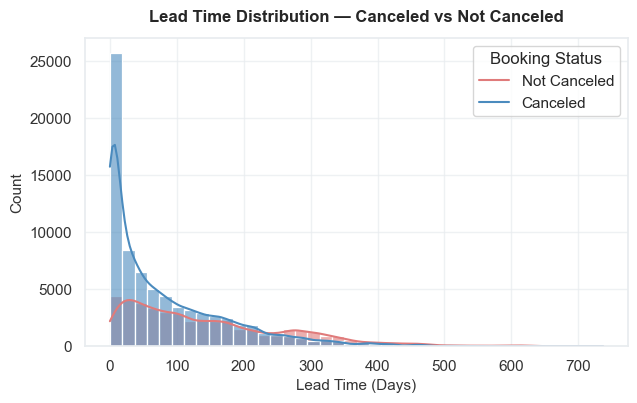

In [18]:
sns.histplot(
    data=df,
    x='lead_time',
    hue='is_canceled',
    bins=40,
    kde=True,
    palette={0: "#4B8BBE", 1: "#E07B7B"},  # Blue for not canceled, red for canceled
    alpha=0.6
)
plt.title("Lead Time Distribution — Canceled vs Not Canceled", fontsize=12, fontweight='bold')
plt.xlabel("Lead Time (Days)")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=["Not Canceled", "Canceled"])
plt.show()


C:\Users\fazmina\AppData\Local\Temp\ipykernel_28196\4074661896.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby('lead_time_bucket')['is_canceled'].mean().reset_index()


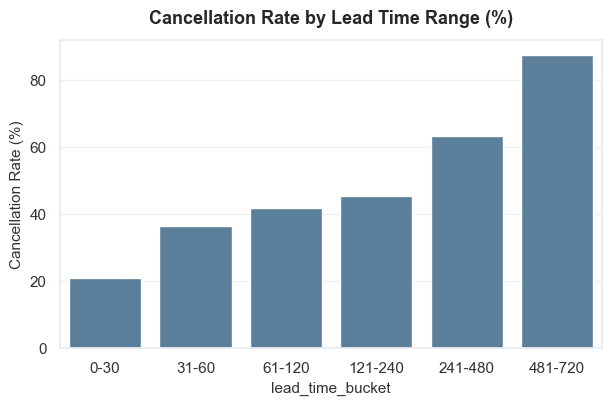

In [19]:
df['lead_time_bucket'] = pd.cut(df['lead_time'], bins=[0,30,60,120,240,480,720],
                                labels=['0-30','31-60','61-120','121-240','241-480','481-720'])

cancel_rate = df.groupby('lead_time_bucket')['is_canceled'].mean().reset_index()
cancel_rate['is_canceled'] = cancel_rate['is_canceled'] * 100

plt.figure(figsize=(7,4))
sns.barplot(data=cancel_rate, x='lead_time_bucket', y='is_canceled')
plt.title("Cancellation Rate by Lead Time Range (%)")
plt.ylabel("Cancellation Rate (%)")
plt.show()


Finding:
City Hotels receive double the bookings compared to Resort Hotels, despite slightly higher prices.

Why:
City Hotels cater to short-stay, high-frequency travelers, supported by online travel agents and corporate contracts.
They operate year-round with stable demand and strong OTA visibility.
Resort Hotels, on the other hand, depend more on seasonal tourism and longer-stay leisure guests.

Impact:
City Hotels ensure consistent occupancy, while Resorts rely on peak-season profitability.

### Average Daily Rate (ADR) Pattern
Question : which segment, season and country give us higher revenue potential

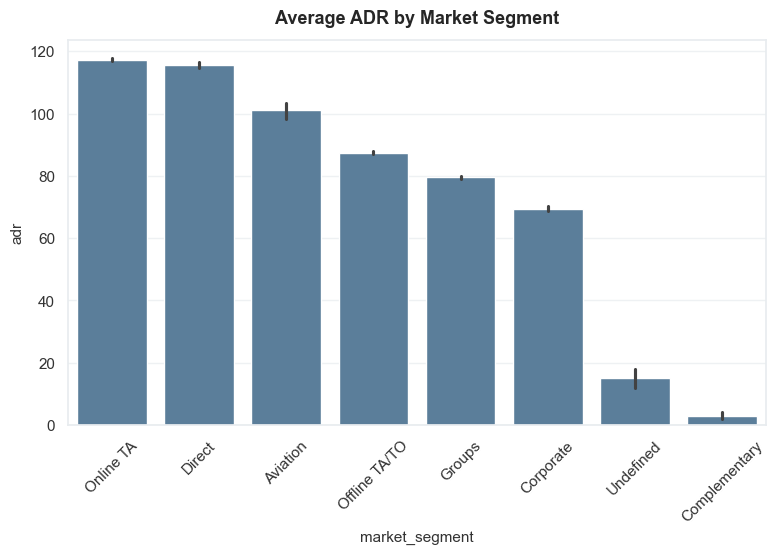

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=df, x='market_segment', y='adr', estimator=np.mean,
            order=df.groupby('market_segment')['adr'].mean().sort_values(ascending=False).index)
plt.title("Average ADR by Market Segment")
plt.xticks(rotation=45)
plt.show()

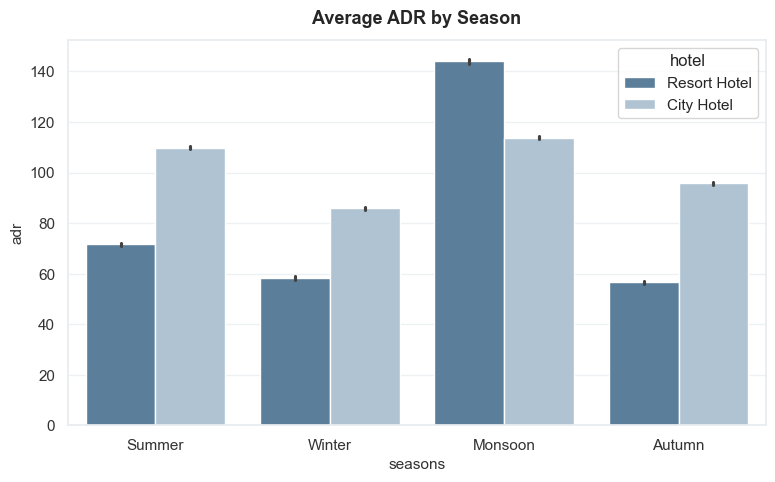

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=df, x='seasons', y='adr', estimator=np.mean, hue='hotel')
plt.title("Average ADR by Season")
plt.show()

### What drives cancellations?  
Question : What condition increase the cancellation

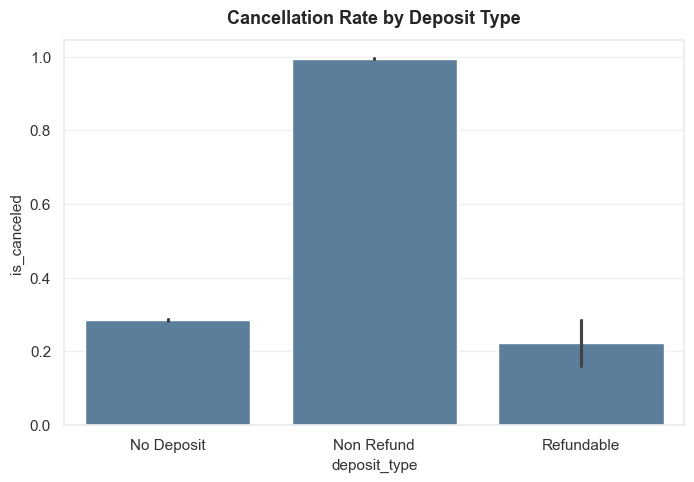

In [ ]:
# Deposit type?
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='deposit_type', y='is_canceled', estimator=np.mean)
plt.title("Cancellation Rate by Deposit Type")
plt.show()

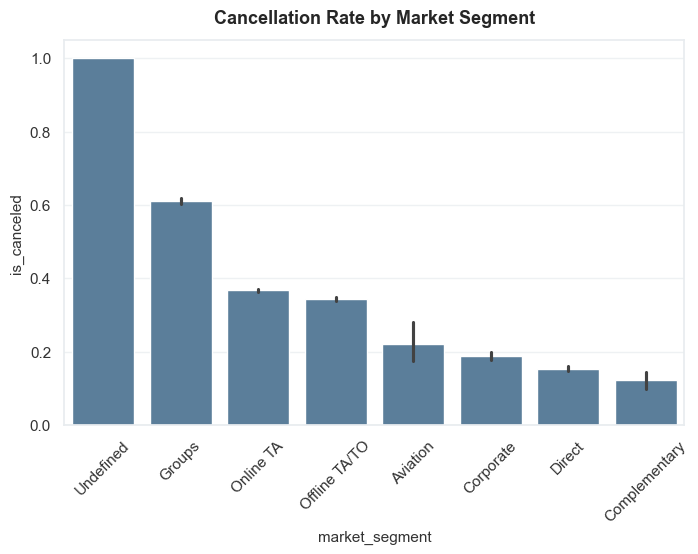

In [ ]:
# which market segment?
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='market_segment', y='is_canceled', estimator=np.mean,
            order=df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False).index)
plt.title("Cancellation Rate by Market Segment")
plt.xticks(rotation=45)
plt.show()

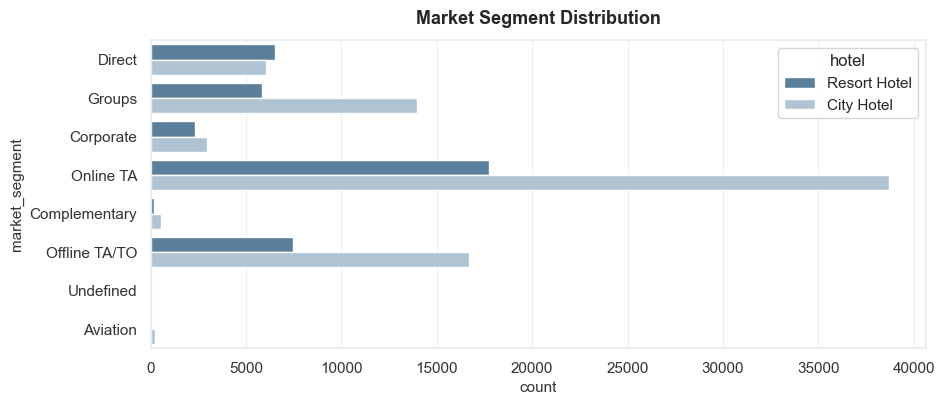

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, y='market_segment', hue='hotel')
plt.title("Market Segment Distribution")
plt.show()

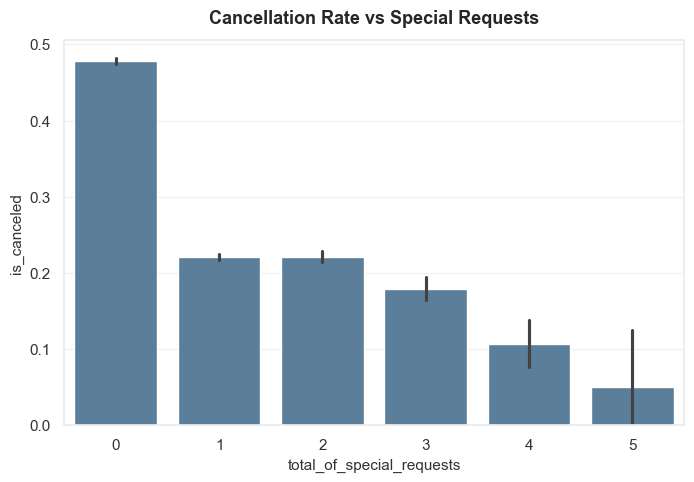

In [ ]:
# More special requests = engaged guests = fewer cancellations?
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='total_of_special_requests', y='is_canceled', estimator=np.mean)
plt.title("Cancellation Rate vs Special Requests")
plt.show()

### Country and Region Distribution  
Question : Where do more guests come from?

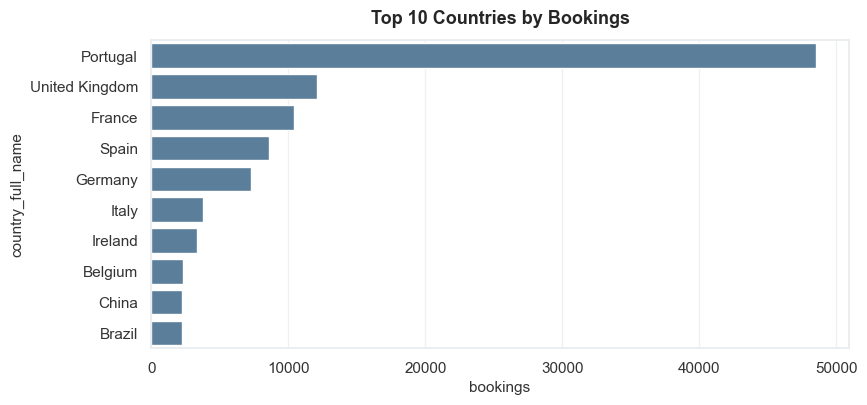

In [ ]:
top_countries = df['country_full_name'].value_counts().head(10).reset_index()
top_countries.columns = ['country_full_name', 'bookings']

plt.figure(figsize=(9,4))
sns.barplot(data=top_countries, x='bookings', y='country_full_name')
plt.title("Top 10 Countries by Bookings")
plt.show()


### Revenue Analysis  
Which season drives Revenue?



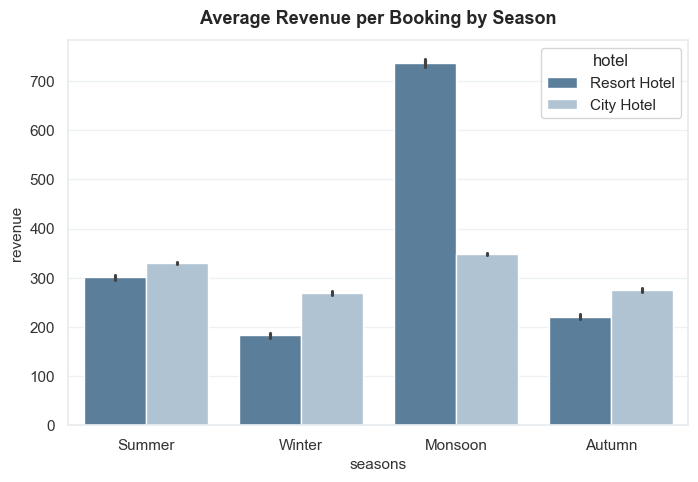

In [ ]:
df['revenue'] = df['adr'] * df['stay_length']

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='seasons', y='revenue', estimator=np.mean, hue='hotel')
plt.title("Average Revenue per Booking by Season")
plt.show()


### Correlation Heatmap

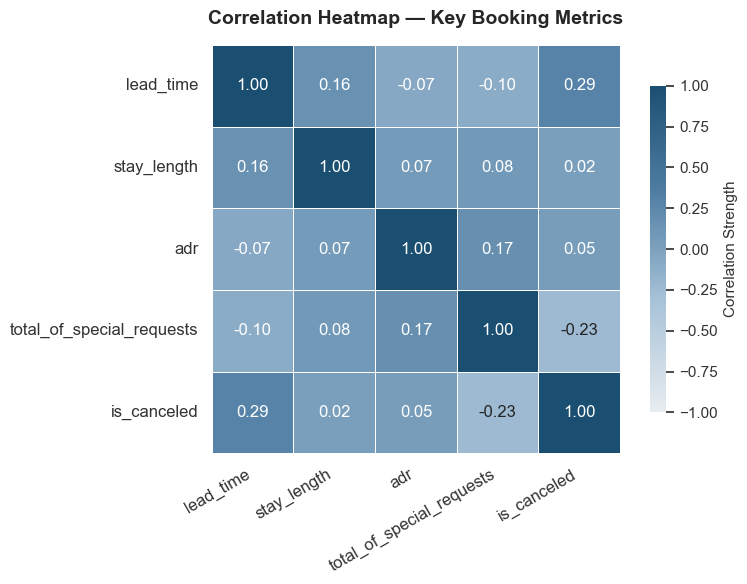

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Compute correlation matrix
corr = df[['lead_time','stay_length','adr','total_of_special_requests','is_canceled']].corr()

# Define your custom professional blue-grey palette
# (Dark steel blue → muted slate → light grey)
colors = ["#E8ECEF", "#A9C4D9", "#517FA4", "#1B4F72"]  # Light → Deep blue tones
custom_cmap = LinearSegmentedColormap.from_list("blue_grey_soft", colors, N=256)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    vmin=-1, vmax=1,
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Strength', 'shrink': 0.8}
)

# Titles and labels
plt.title("Correlation Heatmap — Key Booking Metrics", fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
